In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [699]:
url = "https://raw.githubusercontent.com/robert-koch-institut/COVID-19-Impfungen_in_Deutschland/master/Aktuell_Deutschland_Landkreise_COVID-19-Impfungen.csv"
data = pd.read_csv(url, sep=",")

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [700]:
data

,Impfdatum,LandkreisId_Impfort,Altersgruppe,Impfschutz,Anzahl
0,2020-12-27,1003,18-59,1,9
1,2020-12-27,1003,60+,1,19
2,2020-12-27,1053,18-59,1,13
3,2020-12-27,1053,60+,1,200
4,2020-12-27,1055,18-59,1,20
...,...,...,...,...,...
644324,2021-12-15,u,12-17,3,22
644325,2021-12-15,u,18-59,1,61
644326,2021-12-15,u,18-59,2,38
644327,2021-12-15,u,18-59,3,1654


In [503]:
agg = pd.pivot_table(data, values="Anzahl", index=["Impfdatum","Altersgruppe"], columns="Impfschutz", aggfunc=np.sum)
agg_avg = ( agg.loc["2021-12-08"] + agg.loc["2021-12-09"] + agg.loc["2021-12-10"] + agg.loc["2021-12-11"] + agg.loc["2021-12-12"] + agg.loc["2021-12-13"] + agg.loc["2021-12-14"] + agg.loc["2021-12-15"])/7

In [504]:
latest = data.loc[data.Impfdatum==data.Impfdatum.values[-1],:]
agg = pd.pivot_table(latest, values="Anzahl", index="Altersgruppe", columns="Impfschutz", aggfunc=np.sum)

Text(0.5, 0, 'Altersgruppe')

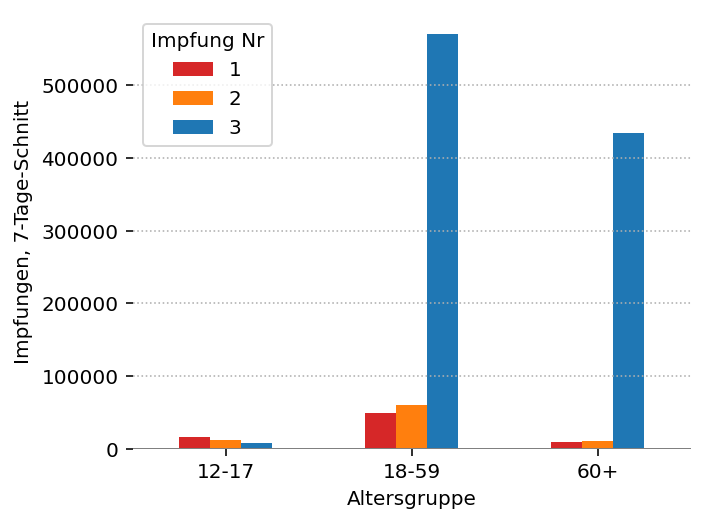

In [702]:
plt.rcParams['figure.facecolor']='white'
agg_avg.plot.bar(figsize=(5,4), color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Impfungen, 7-Tage-Schnitt")
plt.xticks(rotation=0)
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

In [506]:
agg

Impfschutz,1,2,3
Altersgruppe,,,
12-17,29885,16783,8079
18-59,52966,82910,681518
60+,11098,16340,596772


In [507]:
(agg  / agg.values.sum() * 100).round(1)

Impfschutz,1,2,3
Altersgruppe,,,
12-17,2.0,1.1,0.5
18-59,3.5,5.5,45.5
60+,0.7,1.1,39.9


In [725]:
hr = np.array([2e-3, 2e-2, 1.6e-1])
ve = np.array([1-0.08, (1-0.04)*0.08, 0.99*0.2])
#ve = np.array([76.7, 83.7*(100-76.7)/100, 96.9*(100-67.6)/100])/100.
rr =  hosp / hosp * (hr.reshape(-1,1) * ve.reshape(1,-1))
hosp = agg_avg * rr

Text(0.5, 0, 'Altersgruppe')

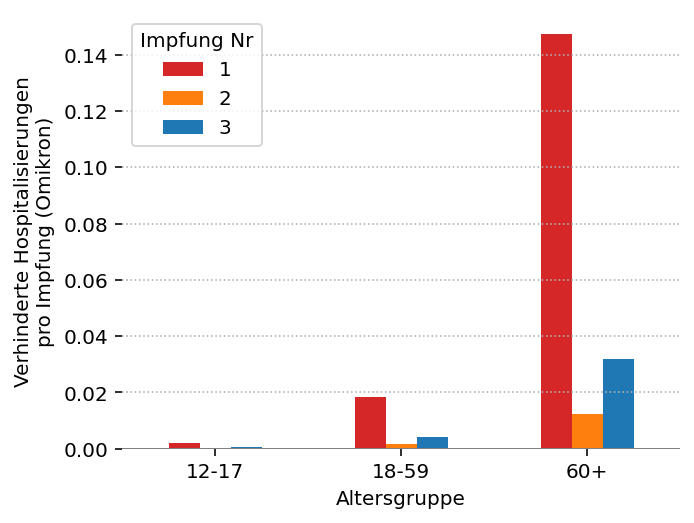

In [726]:
plt.rcParams['figure.facecolor']='white'
rr.plot.bar(figsize=(5,4),color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Verhinderte Hospitalisierungen\npro Impfung (Omikron)")
plt.xticks(rotation=0)
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

Text(0.5, 0, 'Altersgruppe')

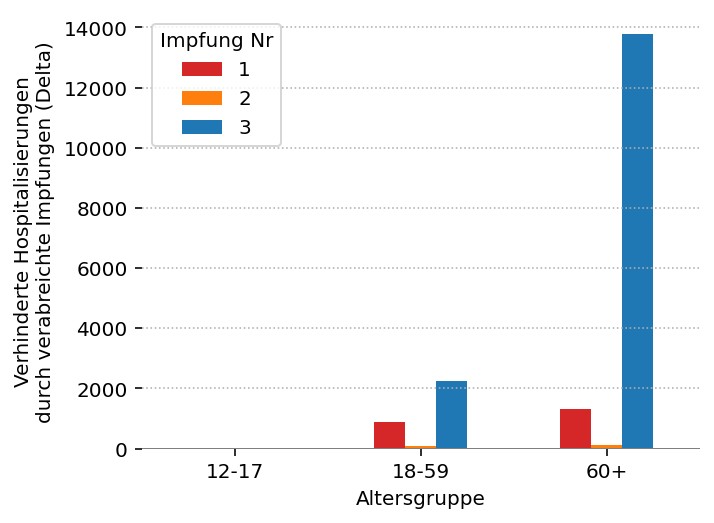

In [719]:
plt.rcParams['figure.facecolor']='white'
hosp.plot.bar(figsize=(5,4),color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Verhinderte Hospitalisierungen\ndurch verabreichte Impfungen (Delta)")
plt.xticks(rotation=0)
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

In [510]:
hosp

Impfschutz,1,2,3
Altersgruppe,,,
12-17,3.303857,1.159529,0.356100
18-59,96.631143,59.358143,285.009786
60+,176.774286,108.030000,2173.143571


In [511]:
rate = pd.read_csv("https://raw.githubusercontent.com/robert-koch-institut/COVID-19-Impfungen_in_Deutschland/master/Aktuell_Deutschland_Impfquoten_COVID-19.csv")

In [512]:
rate

,Datum,Bundesland,BundeslandId_Impfort,Impfungen_gesamt,Impfungen_gesamt_min1,Impfungen_gesamt_voll,Impfungen_gesamt_boost,Impfquote_gesamt_min1,Impfquote_12bis17_min1,Impfquote_18plus_min1,...,Impfquote_gesamt_voll,Impfquote_12bis17_voll,Impfquote_18plus_voll,Impfquote_18bis59_voll,Impfquote_60plus_voll,Impfquote_gesamt_boost,Impfquote_12bis17_boost,Impfquote_18plus_boost,Impfquote_18bis59_boost,Impfquote_60plus_boost
0,2021-12-15,Deutschland,0,138226586,60679186,58171445,22923853,73.0,57.7,83.7,...,70.0,49.5,80.7,77.4,86.8,27.6,3.1,32.8,24.3,48.8
1,2021-12-15,Schleswig-Holstein,1,5095490,2234493,2165657,828546,76.8,71.3,88.7,...,74.4,63.0,86.4,83.7,91.1,28.5,1.5,33.9,23.2,52.8
2,2021-12-15,Hamburg,2,3165846,1447714,1404726,418510,78.2,58.5,90.4,...,75.8,52.7,88.0,88.1,88.0,22.6,2.9,27.0,20.5,43.3
3,2021-12-15,Niedersachsen,3,13572457,5993160,5730743,2277567,74.9,64.0,85.6,...,71.6,55.8,82.2,78.4,89.1,28.5,3.7,33.9,26.2,48.1
4,2021-12-15,Bremen,4,1270480,581272,555390,180716,85.5,59.8,98.6,...,81.7,53.8,94.4,94.5,94.1,26.6,1.3,31.7,21.9,51.7
5,2021-12-15,Nordrhein-Westfalen,5,31511293,13761513,13106872,5441178,76.8,64.2,88.0,...,73.1,56.3,84.1,81.3,89.6,30.4,3.3,36.3,27.2,53.8
6,2021-12-15,Hessen,6,10193456,4580976,4333044,1526609,72.8,57.2,83.7,...,68.9,49.0,79.5,76.7,85.3,24.3,3.0,29.0,21.6,43.7
7,2021-12-15,Rheinland-Pfalz,7,6854529,3033644,2839431,1146107,74.0,59.9,84.6,...,69.3,49.9,79.6,75.5,87.1,28.0,3.5,33.2,24.5,49.0
8,2021-12-15,Baden-Württemberg,8,17948450,7813149,7561106,3043248,70.4,53.6,81.1,...,68.1,45.3,79.0,75.9,85.2,27.4,3.5,32.8,25.3,48.0
9,2021-12-15,Bayern,9,21429738,9275995,8996572,3655235,70.6,58.8,80.8,...,68.5,49.1,78.9,76.1,84.7,27.8,3.0,33.1,24.3,51.1


In [513]:
pop = pd.read_csv("https://service.destatis.de/bevoelkerungspyramide/data/14_bevoelkerungsvorausberechnung_daten.csv", sep=";")

In [514]:
pop=pop.rename(columns = {j:i for i,j in enumerate(pop.columns[4:])})

In [515]:
pop = pop.loc[pop.Variante==0,:]

In [516]:
pop_agg = pd.pivot_table(pop, index="Simulationsjahr", values=pop.columns[4:], aggfunc=np.sum)

In [517]:
pop_groups = np.array([pop_agg.loc[2018,np.arange(12,18)].sum(),
                       pop_agg.loc[2018,np.arange(18,60)].sum(), 
                       pop_agg.loc[2018,np.arange(60,100)].sum()])

In [518]:
pop_groups

array([ 4521., 46039., 23362.])

In [519]:
ind =["12bis17", "18bis59","60plus"]
rate_groups = pd.DataFrame({k:rate.loc[0,["Impfquote_"+j+"_"+k for j in ind]].values for k in ["min1","voll","boost"]}, index=ind)
rate_groups.index = agg_avg.index
rate_groups

,min1,voll,boost
Altersgruppe,,,
12-17,57.7,49.5,3.1
18-59,76.7,77.4,24.3
60+,88,86.8,48.8


In [520]:
missing = ((1-rate_groups.T/100) * pop_groups * 1000).T

In [521]:
missing.columns = pd.Index(np.arange(1,4))


In [648]:
missing_rel = missing.copy()
missing_rel[3] -= missing[2]
missing_rel[2] -=  missing[1]
missing_rel/pop_groups.values/1000

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [523]:
eta = 1 / agg_avg * missing_rel.values
eta

Impfschutz,1,2,3
Altersgruppe,,,
12-17,115.767,31.9718,294.544
18-59,222.021,-5.4293,42.8875
60+,317.177,25.9506,20.4256


In [524]:
eta.iloc[:,:] = eta.values.astype("int").astype("timedelta64[D]") + np.datetime64("today")

In [525]:
#eta.columns = pd.Index(["0 > 1", "1 > 2", "2 > 3"])

In [526]:
eta

Impfschutz,1,2,3
Altersgruppe,,,
12-17,2022-04-10,2022-01-16,2022-10-06
18-59,2022-07-26,2021-12-11,2022-01-27
60+,2022-10-29,2022-01-10,2022-01-05


In [527]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b \'%y')

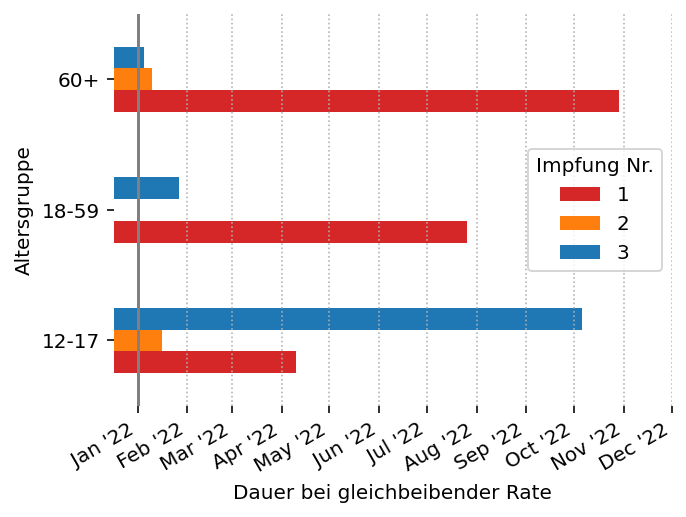

In [705]:
plt.rcParams['figure.facecolor']='white'
b = eta.plot.barh(figsize=(5,4),color=['C3','C1','C0'])
#date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.xlabel(f"Dauer bei gleichbeibender Rate")
plt.yticks(rotation=0)
plt.xlim((np.datetime64("today"),np.datetime64("2022-12-01")))#eta.max().max()))
plt.axvline(np.datetime64("2022-01-01"), color='gray')
plt.grid(axis='x', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.legend(title="Impfung Nr.")
plt.gca().xaxis.set_major_formatter(myFmt)
plt.gcf().autofmt_xdate()


Text(0.5, 1.0, 'Deutschland')

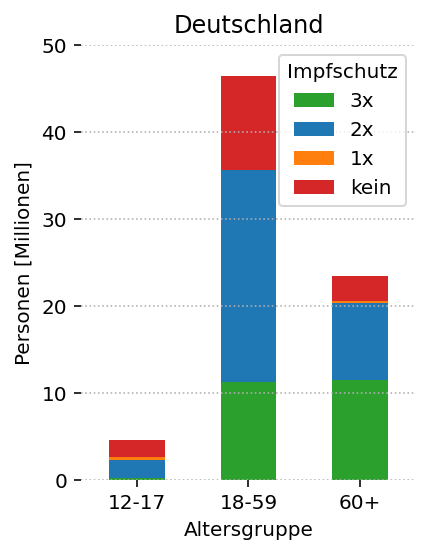

In [713]:
missing_rel.columns = ["kein", "1x", "2x"]
none = rate_groups.boost/100 * pop_groups * 1000
none.name = "3x"
pd.concat([missing_rel/1e6, none/1e6], axis=1).iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Personen [Millionen]")
plt.xticks(rotation=0)
plt.ylim((0,50))
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.legend(title = "Impfschutz")
plt.title("Deutschland")

In [470]:
pd.Index(none.index, name="0")

Index(['12-17', '18-59', '60+'], dtype='object', name='0')

In [475]:
none.name

'boost'

In [598]:
uk = pd.read_csv("vaccination_uk.csv")

In [599]:
uk['factor'] = np.array([0,0,1,1,1,1,1,1,1,1,2,2,2,2,2])

In [603]:
uk_group = uk.iloc[:,1:].groupby('factor').sum(0)
uk_group.index=agg.index
#uk_group["None"] = uk_group["Pop ONS"] - uk_group["1st dose"]

Text(0.5, 1.0, 'England')

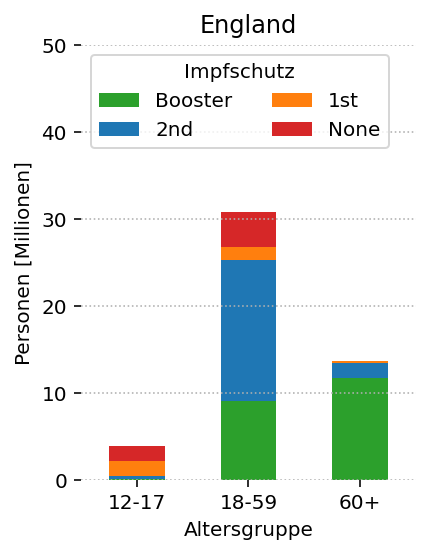

In [714]:
uk_missing = uk_group.iloc[:,:3].copy()
uk_missing["1st dose"] -= uk_missing["2nd dose"]
uk_missing["2nd dose"] -= uk_missing["Booster and 3rd dose"]
uk_missing["None"] = uk_group["Pop ONS"] - uk_group["1st dose"]
uk_missing = uk_missing.rename(columns={x:x.split()[0] for x in uk_missing.columns.values})
(uk_missing.iloc[:,[3,0,1,2]]/1e6).iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Personen [Millionen]")
plt.xticks(rotation=0)
plt.ylim((0,50))
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.legend(loc="upper left", title = "Impfschutz", ncol=2)
plt.title("England")

In [622]:
uk_missing.columns

Index(['1st dose', '2nd dose', 'Booster and 3rd dose', 'None'], dtype='object')

In [635]:
uk.sum(0)

Age Group               12-1516-1718-2425-2930-3435-3940-4445-4950-545...
1st dose                                                         42524734
2nd dose                                                         39087613
Booster and 3rd dose                                             20686782
Pop ONS                                                          48375273
factor                                                                 18
dtype: object